In [1]:
import random
from pathlib import Path
from preprocessing import clean_gutenberg, tokenize
from collocations import make_graph, cosine_similarities
from plotting import draw_graph

In [2]:
def read_all(directory):
    return [file.read_text() for file in Path(directory).glob('*') if file.is_file()]

def neighbourhood(graph, node, filter_function=lambda edges: edges):
    edges = filter_function(graph.out_edges(node, data=True))
    return graph.edge_subgraph([(edge[0], edge[1]) for edge in edges])

def top_n_filter(n):
    return lambda edges: sorted(edges, key=lambda item: item[2]["weight"], reverse=True)[:n]

def draw(graph):
    return draw_graph(graph, label_attribute="weight", label_function=lambda x: f"{x:.3f}", width_attribute="weight")

In [3]:
directory1, directory2 = "data/1", "data/2"

In [4]:
tokens, vocabulary = tokenize([
    "\n".join(clean_gutenberg(text) for text in read_all(directory1)), 
    "\n".join(clean_gutenberg(text) for text in read_all(directory2)), 
])

In [5]:
G1 = make_graph(tokens[0], vocabulary)

In [6]:
G2 = make_graph(tokens[1], vocabulary)

In [7]:
similarities = cosine_similarities(G1, G2, vocabulary)
similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

100%|██████████| 61536/61536 [1:56:02<00:00,  8.84it/s]  


In [8]:
node, score = random.choice([(node, score) for node, score in similarities if 1 > score > 0])

In [9]:
score

0.08571603480814684

In [10]:
draw(neighbourhood(G1, node, filter_function=top_n_filter(10)))

In [11]:
draw(neighbourhood(G2, node, filter_function=top_n_filter(10)))

(array([2203.,  197.,   61.,   42.,   16.,    5.,    3.,    8.,    6.,
          11.]),
 array([5.58556761e-06, 9.99955304e-02, 1.99985475e-01, 2.99975420e-01,
        3.99965365e-01, 4.99955310e-01, 5.99945255e-01, 6.99935200e-01,
        7.99925145e-01, 8.99915089e-01, 9.99905034e-01]),
 <BarContainer object of 10 artists>)

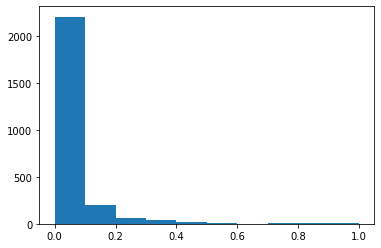

In [12]:
import matplotlib.pyplot as plt
plt.hist([v for v in dict(similarities).values() if 1 > v > 0])